## Conductivity mass balance for hydrograph separation

### Hungerford Brook, 2022 ISCO dataset

#### Data are from the BREE OneDrive directory (Watershed Data>1_Projects>EMMA>Working file for MATLAB 2023>Data_for_EMMA_2022_HB.csv)

    For HB 2022 timeseries, 17 parameters total

#### I didn't manipulate the csv in any way, just downloaded from the Sharepoint directory onto my machine. Aim to convert this code to work for 15 min interval SC data from the EXO2 (YSI) sonde, but for now will attempt with ISCO chloride.

In [1]:
import os
os.chdir("/home/millieginty/Documents/git-repos/EMMA/")

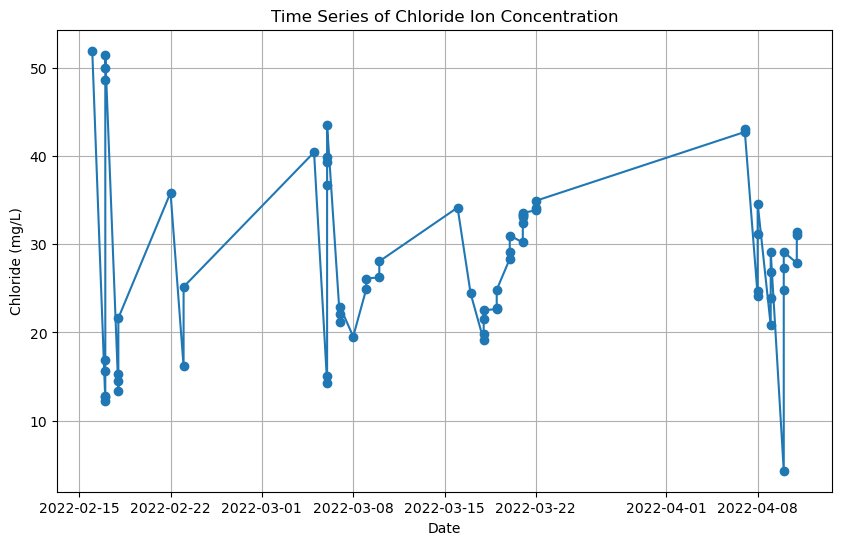

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Load the data from the CSV file
data = pd.read_csv("data/Data_for_EMMA_2022_HB.csv")

# Get the list of solutes from the headers starting from the 6th column
solutes = list(data.columns[5:])

# Convert the "Date" column to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%y", errors="coerce")

# Drop rows with invalid dates
data = data.dropna(subset=["Date"])

# Set the "Date" column as the index
data.set_index("Date", inplace=True)

# Plot the time series for "Cl_mg_L"
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Cl_mg_L"], marker='o', linestyle='-')
plt.title('Time Series of Chloride Ion Concentration')
plt.xlabel('Date')
plt.ylabel('Chloride (mg/L)')
plt.grid(True)
plt.show()

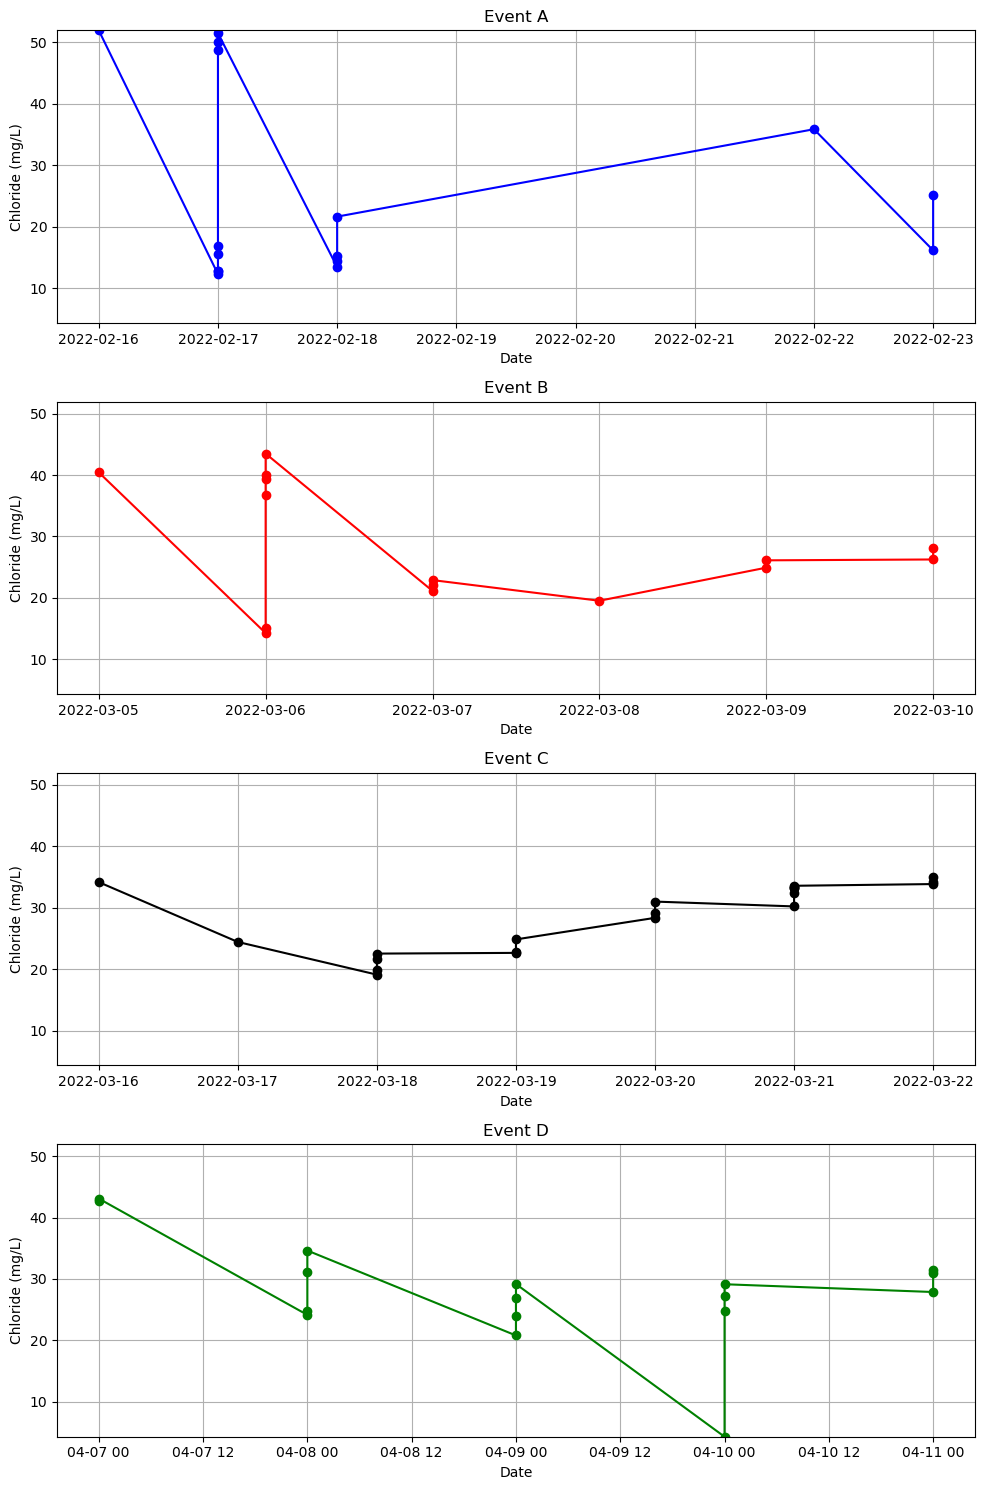

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("data/Data_for_EMMA_2022_HB.csv")

# Get the list of solutes from the headers starting from the 6th column
solutes = list(data.columns[5:])

# Convert the "Date" column to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%y", errors="coerce")

# Drop rows with invalid dates
data = data.dropna(subset=["Date"])

# Set the "Date" column as the index
data.set_index("Date", inplace=True)

# Define date ranges and corresponding colors
date_ranges = {
    "Event A": ("2022-02-16", "2022-02-23", "b"),  # Blue
    "Event B": ("2022-03-05", "2022-03-10", "r"),  # Red
    "Event C": ("2022-03-16", "2022-03-22", "k"),  # Black
    "Event D": ("2022-04-07", "2022-04-11", "g")   # Green
}

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15), sharey=True)

# Plot each event in a separate subplot
for ax, (event, (start_date, end_date, color)) in zip(axes, date_ranges.items()):
    event_data = data.loc[start_date:end_date]
    ax.plot(event_data.index, event_data["Cl_mg_L"], marker='o', linestyle='-', color=color)
    ax.set_title(event)
    ax.set_xlabel('Date')
    ax.set_ylabel('Chloride (mg/L)')
    ax.grid(True)

# Set the same y-axis range for all subplots
all_data = data["Cl_mg_L"].loc[
    pd.to_datetime(date_ranges["Event A"][0]):pd.to_datetime(date_ranges["Event D"][1])
]
min_val, max_val = all_data.min(), all_data.max()
for ax in axes:
    ax.set_ylim(min_val, max_val)

plt.tight_layout()
plt.show()
